### Importando as bibliotecas utilizadas

In [7]:
import matplotlib.pyplot as plt
import numpy as np

## Testando Biblioteca

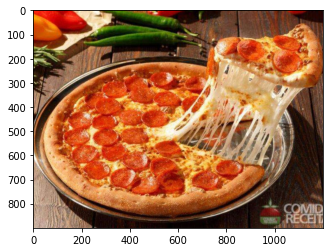

In [4]:
image = plt.imread('pizza')
plt.imshow(image)

### Tamanho da matriz

In [5]:
image.shape

(900, 1200, 3)

### Formato RGB

#### Deixando a imagem toda vermelha, zerando as camadas verde e azul

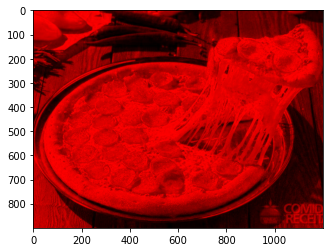

In [11]:
r = image.copy()
r[:,:,1] = 0
r[:,:,2] = 0
plt.imshow(r)

# Tarefa 1